# 단일 표본 T-Test (One Sample T-Test)

**하나의 모집단 평균**이 **이전보다** 달라졌는지/같은지, 달라졌다면 커졌는지/작아졌는지를 통계적으로 알아보기 위해 사용한다.

기존에 알려져 있던 사실이 현재는 어떻게 변화 했는지를 확인하는 방법이다.

단일 표본 T-Test에서는 데이터의 정규성만을 확인하고 등분산성은 확인하지 않는다.

등분산성은 두 개 이상의 집단일 경우에만 확인한다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *

## #02. 예제(1) - 단일표본 T검정 : 강아지 체온 변화

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/temperature.xlsx")
origin

데이터프레임 크기: 행 수: 25, 열 수: 1

데이터프레임 상위 5개 행
+----+--------+
|    |   체온 |
|----+--------|
|  0 |   25.8 |
|  1 |   24.6 |
|  2 |   26.1 |
|  3 |   22.9 |
|  4 |   25.1 |
+----+--------+

데이터프레임 하위 5개 행
+----+--------+
|    |   체온 |
|----+--------|
| 20 |   23.9 |
| 21 |     27 |
| 22 |   24.8 |
| 23 |   22.9 |
| 24 |   25.4 |
+----+--------+

결측치 개수
+----+--------+
|    |   체온 |
|----+--------|
|  0 |      0 |
+----+--------+

기술통계
+------+---------+--------+--------+-------+-------+-------+-------+-------+-------+
|      |   count |   mean |    std |   min |   25% |   50% |   75% |   max |   nan |
|------+---------+--------+--------+-------+-------+-------+-------+-------+-------|
| 체온 |      25 | 25.028 | 1.3418 |  22.9 |    24 |  24.8 |  25.8 |  28.1 |     0 |
+------+---------+--------+--------+-------+-------+-------+-------+-------+-------+


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1
5,27.3
6,24.0
7,24.5
8,23.9
9,26.2


### [2] 신뢰구간 확인

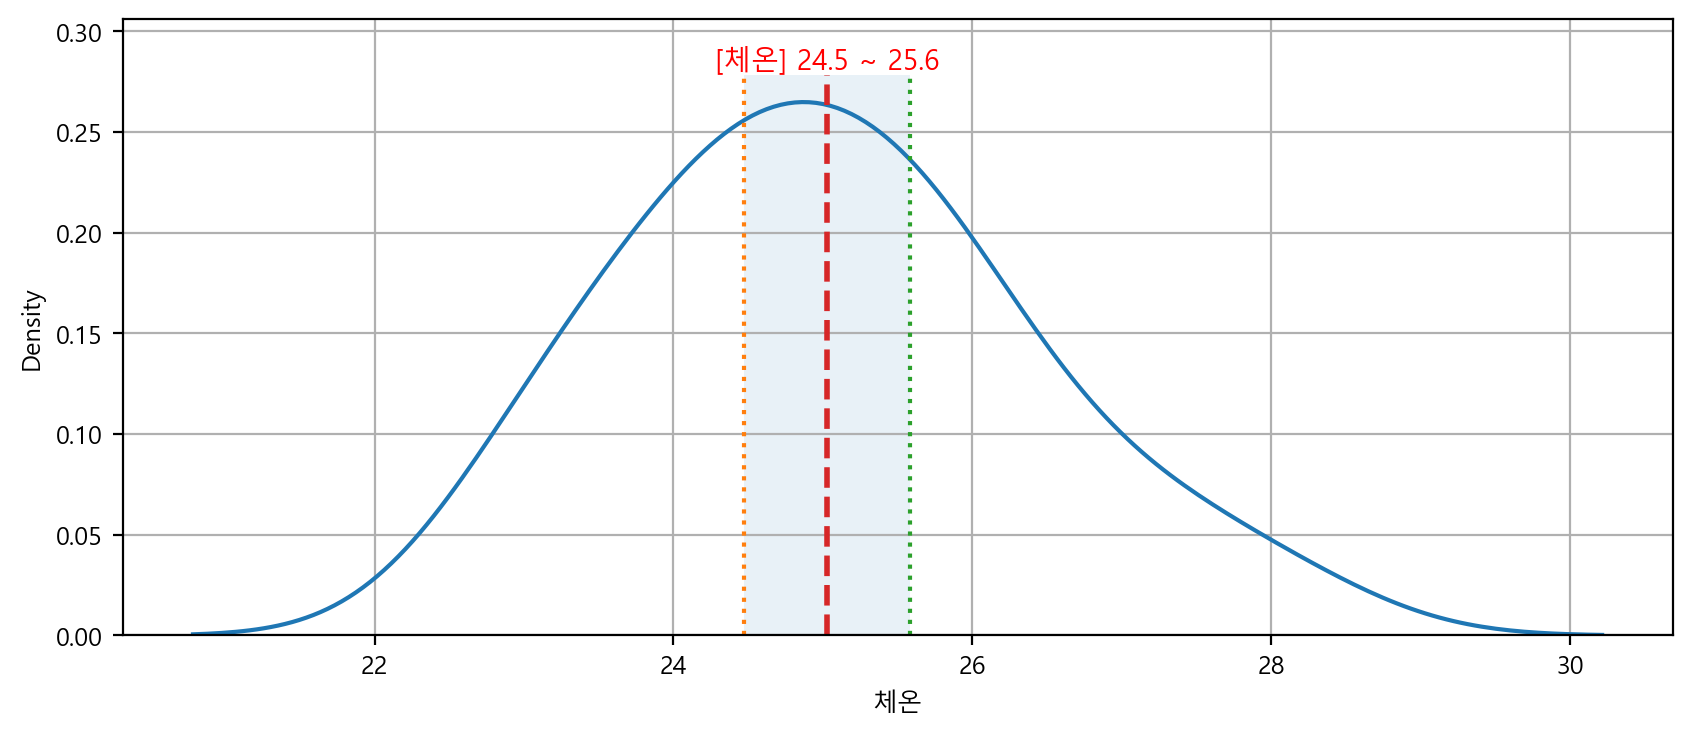

In [3]:
my_kde_confidence_interval(origin)

### [3] 데이터의 정규성 검정

In [4]:
my_normal_test(origin, method = "shapiro")

[shapiro-체온] statistic: 0.976, p-value: 0.801, 정규성 충족 여부: True


### [4] 강아지의 평균 체온이 이전에 알려져 있던 `24.3`과 달려졌는지 여부

#### (1) T검증 수행

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 강아지의 평균 체온 | $\mu$           |                                            |
| 귀무가설($H_0$)    | $\mu = 24.3$    | 강아지의 평균 체온은 `24.3`과 차이가 없다. |
| 대립가설($H_1$)    | $\mu \neq 24.3$ | 강아지의 평균 체온은 `24.3`과 차이가 있다. |


In [5]:
my_ttest_1samp(origin, mean_value=24.3)

+-----------------------+-------------+-----------+-------+-------+------------------+
|                       |   statistic |   p-value | H0    | H1    | interpretation   |
|-----------------------+-------------+-----------+-------+-------+------------------|
| ('체온', 'two-sided') |       2.713 |     0.012 | False | True  | μ != 24.3        |
| ('체온', 'less')      |       2.713 |     0.994 | True  | False | μ >= 24.3        |
| ('체온', 'greater')   |       2.713 |     0.006 | False | True  | μ > 24.3         |
+-----------------------+-------------+-----------+-------+-------+------------------+


#### (2) 결과 해석

##### statistic(T값, 검정 통계량)

표본 데이터를 이용하여 계산되는 값으로 p-값을 계산하기 위해 사용된다.

##### P값(p-value)

| 구분                 | 설명                                                         | 결론          |
| -------------------- | ------------------------------------------------------------ | ------------- |
| $P \lt 0.01$         | 귀무가설이 옳을 확률이 `0.01` 미만(깐깐한 기준)     | 대립가설 채택 |
| $P \lt 0.05$         | 귀무가설이 옳을 확률이 `0.05` 미만(일반적인 기준)   | 대립가설 채택 |
| $0.05 \lt P \lt 0.1$ | 애매한 경우(샘플링을 다시한다)                               | 귀무가설 채택 |
| $0.1 \lt P$          | 귀무가설이 옳을 확률이 0.1 이상 | 귀무가설 채택 |

##### 결과값의 의미

출력에서 일표본 T검정에 대한 유의확률값이 `0.012`로 통상적인 유의수준 0.05보다 작으므로 `유의수준 0.05에서 강아지 25마라의 체온이 추출된 모집단의 평균인 24.3이라고 할 수 없다.`

## 예제 (2) - 독립 표본 T검정 : 지혈제 효과 비교

### [1] 데이터 가져오기

In [22]:
origin = my_read_excel("https://data.hossam.kr/mldata/styptic.xlsx", info=False)
my_pretty_table(origin.head())

+----+-----+------+
|    |   B |    G |
|----+-----+------|
|  0 | 8.8 |  9.9 |
|  1 | 8.9 |   10 |
|  2 | 8.4 |    9 |
|  3 | 7.9 | 11.1 |
|  4 | 8.2 |  9.8 |
+----+-----+------+


### [2] 정규성, 등분산성 검정

In [23]:
df = melt(origin)
my_normal_equal_var_1field(df, xname='value', hue='variable')

+----------+-------------+-----------+----------+
| field    |   statistic |   p-value | result   |
|----------+-------------+-----------+----------|
| B        |   0.0832685 |  0.959221 | True     |
| G        |     0.20095 |  0.904408 | True     |
| Bartlett |    0.555515 |  0.456073 | True     |
+----------+-------------+-----------+----------+


### [3] 독립표본 T검정

In [10]:
my_ttest_ind(origin, 'B','G', equal_var=True)

+-----------------------------+-------------+-----------+-------+-------+------------------+
|                             |   statistic |   p-value | H0    | H1    | interpretation   |
|-----------------------------+-------------+-----------+-------+-------+------------------|
| ('t-test_ind', 'two-sided') |       -4.35 |         0 | False | True  | μ(B) != μ(G)     |
| ('t-test_ind', 'less')      |       -4.35 |         0 | False | True  | μ(B) < μ(G)      |
| ('t-test_ind', 'greater')   |       -4.35 |         1 | True  | False | μ(B) <= μ(G)     |
+-----------------------------+-------------+-----------+-------+-------+------------------+


### [4] 검정 결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


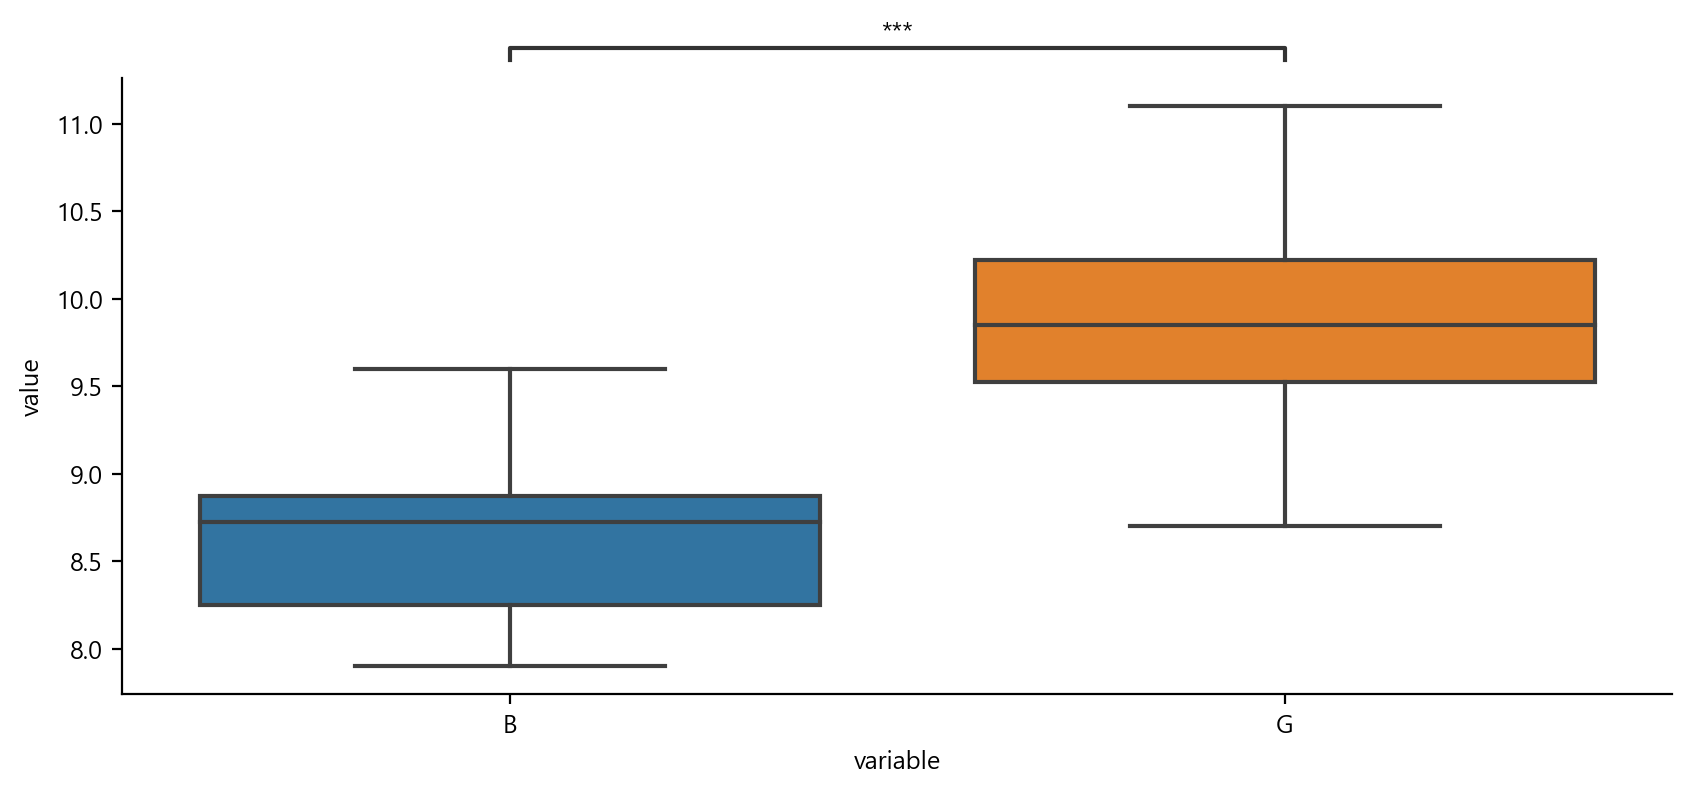

In [24]:
my_pvalue1_anotation(df, test='t-test_ind', target='value', hue='variable',  pairs=[('B', 'G')])

## 예제 (3) - 대응 표본 T검정 : 사슴의 다리 길이 비교

### [1] 데이터 가져오기

In [11]:
origin = my_read_excel("https://data.hossam.kr/mldata/deer.xlsx", index_col='사슴', info=False)
df = melt(origin)
my_pretty_table(df.head())

+----+------------+---------+
|    | variable   |   value |
|----+------------+---------|
|  0 | 앞다리     |     138 |
|  1 | 앞다리     |     136 |
|  2 | 앞다리     |     147 |
|  3 | 앞다리     |     139 |
|  4 | 앞다리     |     143 |
+----+------------+---------+


### [2] 정규성, 등분산성 검정

In [12]:
my_normal_equal_var_1field(df, xname='value', hue='variable')

+----------+-------------+-----------+----------+
| field    |   statistic |   p-value | result   |
|----------+-------------+-----------+----------|
| 앞다리   |       1.824 |   0.40172 | True     |
| 뒷다리   |     1.37696 |  0.502339 | True     |
| Bartlett |    0.246657 |  0.619439 | True     |
+----------+-------------+-----------+----------+


### [3] 대응 표본 T검정

In [13]:
my_ttest_rel(origin, '앞다리', '뒷다리')

+--------------------------------+-------------+-----------+-------+-------+------------------------+
|                                |   statistic |   p-value | H0    | H1    | interpretation         |
|--------------------------------+-------------+-----------+-------+-------+------------------------|
| ('t-test_paired', 'two-sided') |      -3.414 |     0.008 | False | True  | μ(앞다리) != μ(뒷다리) |
| ('t-test_paired', 'less')      |      -3.414 |     0.004 | False | True  | μ(앞다리) < μ(뒷다리)  |
| ('t-test_paired', 'greater')   |      -3.414 |     0.996 | True  | False | μ(앞다리) <= μ(뒷다리) |
+--------------------------------+-------------+-----------+-------+-------+------------------------+


### [4] 검정결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

앞다리 vs. 뒷다리: t-test paired samples, P_val:7.703e-03 t=-3.414e+00


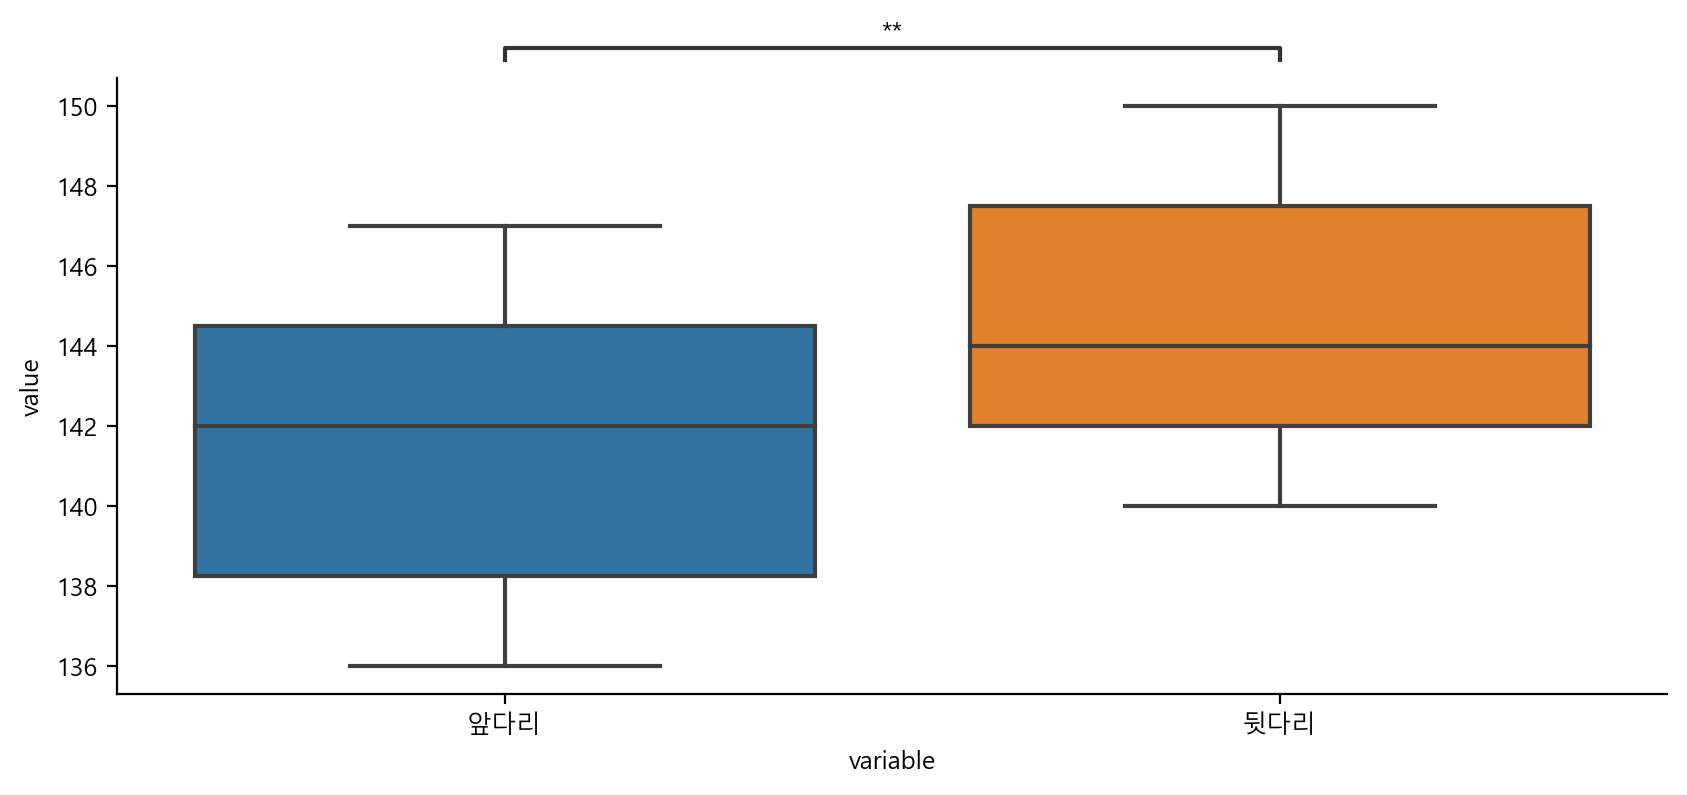

In [17]:
my_pvalue1_anotation(df, test="t-test_paired", target='value', hue='variable', pairs=[('앞다리','뒷다리')])